In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("/content/Whole_dataset.csv")

# Separate features and target
X = df.drop(columns=["Stress_scale"])
y = df["Stress_scale"]

In [3]:
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Second split: 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (4267, 21)
Validation size: (914, 21)
Test size: (915, 21)


In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)



In [29]:
# Print the mean and std for each feature
print("FEATURE_SCALING_PARAMS = {")
for i, col in enumerate(X.columns):
    print(f'    "{col}": {{"mean": {scaler.mean_[i]:.6f}, "std": {scaler.scale_[i]:.6f}}},')
print("}")

FEATURE_SCALING_PARAMS = {
    "Age": {"mean": 1.045700, "std": 1.069650},
    "Gender": {"mean": 0.476682, "std": 0.499456},
    "Current_status": {"mean": 1.566440, "std": 0.912881},
    "Sleep_hours": {"mean": 6.240035, "std": 2.106158},
    "Work_hours": {"mean": 4.920248, "std": 3.366506},
    "Hobby_hours": {"mean": 3.421451, "std": 1.963396},
    "Commute_time": {"mean": 52.772440, "std": 41.282044},
    "Number_of_tasks": {"mean": 5.931028, "std": 3.272100},
    "Task_difficulty": {"mean": 1.015936, "std": 0.873927},
    "Work_under_pressure": {"mean": 1.073119, "std": 0.725702},
    "Social_hours": {"mean": 5.234168, "std": 2.882102},
    "Social_quality": {"mean": 1.128193, "std": 0.859046},
    "Home_environment": {"mean": 0.652683, "std": 0.476117},
    "Stressful_event": {"mean": 0.580736, "std": 0.493439},
    "Arguing/conflict with someone": {"mean": 0.273494, "std": 0.445752},
    "Academic/work failure or poor performance": {"mean": 0.288259, "std": 0.452952},
    "Tra

In [31]:
#Downloading the scaler instead of doing it manually in the gui code
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Logistic regression model**

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model for multinomial classification
# Increased max_iter for convergence with potentially many features/samples
# Removed multi_class='multinomial' as it's the default for 'lbfgs' solver and deprecated.
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")

# Classification report (uses labels directly from y)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

Model Accuracy: 0.4885

Classification Report:

              precision    recall  f1-score   support

           0       0.37      0.15      0.22       190
           1       0.53      0.76      0.63       462
           2       0.38      0.25      0.31       263

    accuracy                           0.49       915
   macro avg       0.43      0.39      0.38       915
weighted avg       0.45      0.49      0.45       915

Confusion Matrix:

[[ 29 129  32]
 [ 35 351  76]
 [ 15 181  67]]


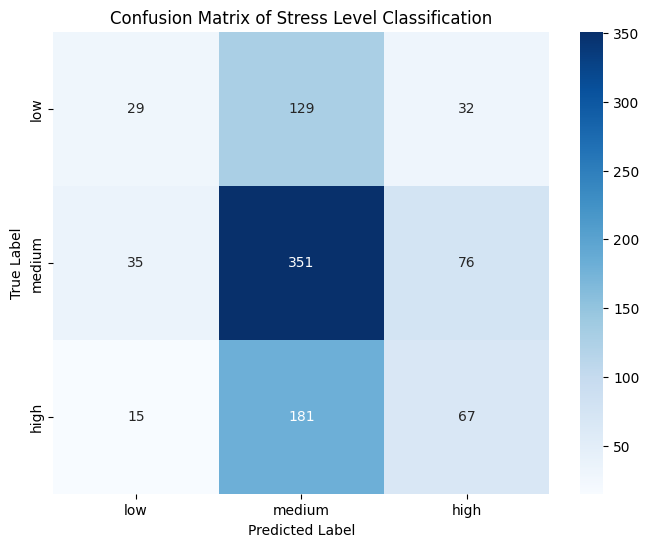

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["low", "medium", "high"],
    yticklabels=["low", "medium", "high"]
)

# Add labels and title
plt.title('Confusion Matrix of Stress Level Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Random forest**

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate overall accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}\n")

# Generate classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print("Random Forest Classification Report:\n")
print(report_rf)

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n")
print(conf_matrix_rf)

Random Forest Model Accuracy: 0.7443

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.49      0.60       190
           1       0.77      0.85      0.81       462
           2       0.68      0.75      0.71       263

    accuracy                           0.74       915
   macro avg       0.74      0.69      0.71       915
weighted avg       0.75      0.74      0.74       915

Random Forest Confusion Matrix:

[[ 93  55  42]
 [ 20 392  50]
 [  7  60 196]]


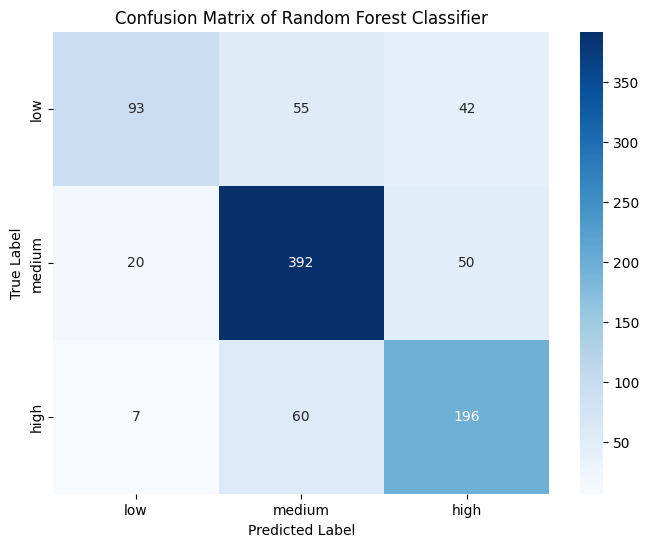

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix for the Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["low", "medium", "high"], yticklabels=["low", "medium", "high"])

# Add labels and title
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**SVM**

In [11]:
svm_model = SVC(
    kernel="rbf",       # Best general-purpose kernel
    C=1.0,              # Regularization
    gamma="scale",      # Default & stable
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [12]:
y_val_pred = svm_model.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Classification Report:\n")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.675054704595186

Validation Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.31      0.42       191
           1       0.69      0.85      0.76       461
           2       0.67      0.63      0.65       262

    accuracy                           0.68       914
   macro avg       0.66      0.60      0.61       914
weighted avg       0.67      0.68      0.66       914



Test Accuracy: 0.6568306010928961

Test Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.34      0.44       190
           1       0.68      0.81      0.74       462
           2       0.63      0.63      0.63       263

    accuracy                           0.66       915
   macro avg       0.64      0.59      0.60       915
weighted avg       0.65      0.66      0.64       915



<Figure size 640x480 with 0 Axes>

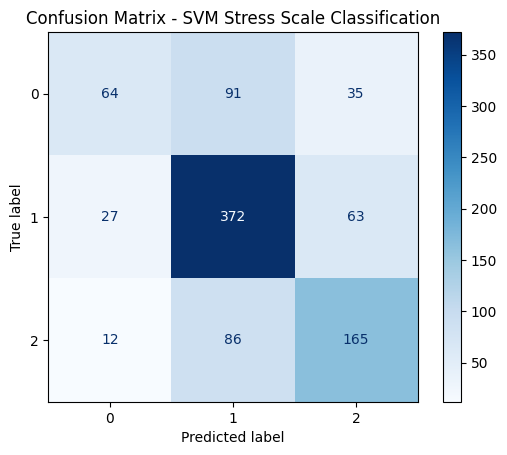

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

y_test_pred = svm_model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1, 2]  # Stress levels
)

plt.figure()
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - SVM Stress Scale Classification")
plt.grid(False)
plt.show()

**Gradient Boosting (XGBoost)**

1. Handles non-linear feature interactions

2. Very strong with mixed numeric + categorical encodings

3. Robust to noise

4. Handles class imbalance using scale_pos_weight

5. Industry standard in tabular data competitions

In [14]:
!pip install xgboost

In [15]:
from xgboost import XGBClassifier

In [16]:
#Training
#XGBoost works on raw values so no scaling is needed.
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=3, ...)

XGBoost Test Accuracy: 0.7027322404371584

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.44      0.52       190
           1       0.73      0.82      0.77       462
           2       0.69      0.68      0.69       263

    accuracy                           0.70       915
   macro avg       0.68      0.65      0.66       915
weighted avg       0.70      0.70      0.69       915



<Figure size 640x480 with 0 Axes>

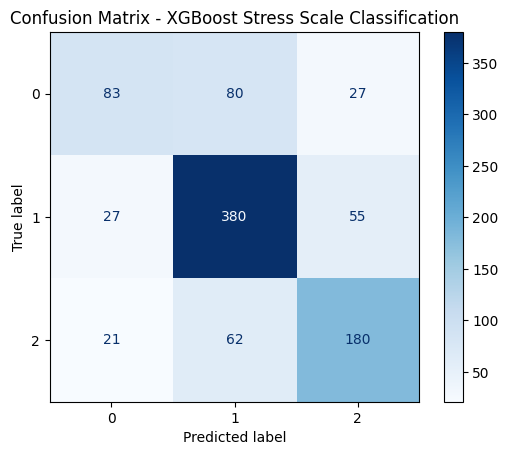

In [17]:
y_test_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_xgb))

cm = confusion_matrix(y_test, y_test_pred_xgb)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1, 2]  # Stress levels
)

plt.figure()
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - XGBoost Stress Scale Classification")
plt.grid(False)
plt.show()

**Multilayer Perceptron (Neural Network)**

1. Learns deep, complex behavioral patterns

2. Models non-linear combinations of many weak signals

3. Good once we have enough samples and normalized data

4. Mimics how stress emerges from multiple simultaneous factors

In [18]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation="relu",
    solver="adam",
    alpha=0.001,              # Regularization
    batch_size=64,
    learning_rate="adaptive",
    max_iter=500,
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, batch_size=64, hidden_layer_sizes=(128, 64, 32),
              learning_rate='adaptive', max_iter=500, random_state=42)

MLP Test Accuracy: 0.7672131147540984

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       190
           1       0.83      0.84      0.83       462
           2       0.73      0.75      0.74       263

    accuracy                           0.77       915
   macro avg       0.74      0.74      0.74       915
weighted avg       0.77      0.77      0.77       915



<Figure size 640x480 with 0 Axes>

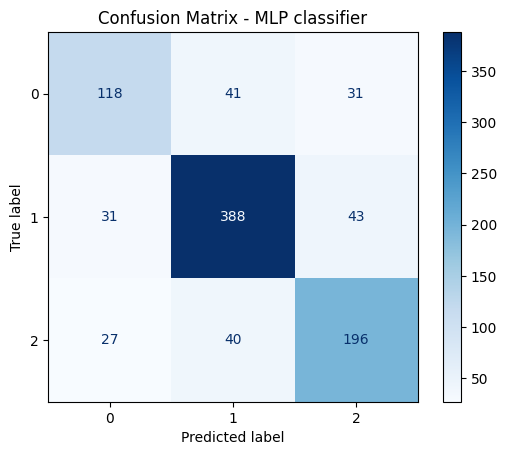

In [19]:
y_test_pred_mlp = mlp_model.predict(X_test_scaled)

print("MLP Test Accuracy:", accuracy_score(y_test, y_test_pred_mlp))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_mlp))

cm = confusion_matrix(y_test, y_test_pred_mlp)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1, 2]  # Stress levels
)

plt.figure()
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - MLP classifier")
plt.grid(False)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# --- Logistic Regression Metrics ---
metrics = {}

# Overall Accuracy for Logistic Regression
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Classification report for Logistic Regression (as dictionary)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True, zero_division=0)

# Extract macro and weighted averages
macro_avg_lr = report_lr['macro avg']
weighted_avg_lr = report_lr['weighted avg']

metrics['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Macro Avg Precision': macro_avg_lr['precision'],
    'Macro Avg Recall': macro_avg_lr['recall'],
    'Macro Avg F1-Score': macro_avg_lr['f1-score'],
    'Weighted Avg Precision': weighted_avg_lr['precision'],
    'Weighted Avg Recall': weighted_avg_lr['recall'],
    'Weighted Avg F1-Score': weighted_avg_lr['f1-score']
}

# --- Random Forest Metrics ---
# Overall Accuracy for Random Forest (already calculated as accuracy_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Classification report for Random Forest (as dictionary)
report_rf_dict = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)

# Extract macro and weighted averages
macro_avg_rf = report_rf_dict['macro avg']
weighted_avg_rf = report_rf_dict['weighted avg']

metrics['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Macro Avg Precision': macro_avg_rf['precision'],
    'Macro Avg Recall': macro_avg_rf['recall'],
    'Macro Avg F1-Score': macro_avg_rf['f1-score'],
    'Weighted Avg Precision': weighted_avg_rf['precision'],
    'Weighted Avg Recall': weighted_avg_rf['recall'],
    'Weighted Avg F1-Score': weighted_avg_rf['f1-score']
}

# --- SVM Metrics ---
# Overall Accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_test_pred)

# Classification report for SVM (as dictionary)
report_svm = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)

# Extract macro and weighted averages
macro_avg_svm = report_svm['macro avg']
weighted_avg_svm = report_svm['weighted avg']

metrics['SVM'] = {
    'Accuracy': accuracy_svm,
    'Macro Avg Precision': macro_avg_svm['precision'],
    'Macro Avg Recall': macro_avg_svm['recall'],
    'Macro Avg F1-Score': macro_avg_svm['f1-score'],
    'Weighted Avg Precision': weighted_avg_svm['precision'],
    'Weighted Avg Recall': weighted_avg_svm['recall'],
    'Weighted Avg F1-Score': weighted_avg_svm['f1-score']
}

# --- XGBoost Metrics ---
# Overall Accuracy for XGBoost (already calculated as accuracy_xgb)
accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

# Classification report for XGBoost (as dictionary)
report_xgb = classification_report(y_test, y_test_pred_xgb, output_dict=True, zero_division=0)

# Extract macro and weighted averages
macro_avg_xgb = report_xgb['macro avg']
weighted_avg_xgb = report_xgb['weighted avg']

metrics['XGBoost'] = {
    'Accuracy': accuracy_xgb,
    'Macro Avg Precision': macro_avg_xgb['precision'],
    'Macro Avg Recall': macro_avg_xgb['recall'],
    'Macro Avg F1-Score': macro_avg_xgb['f1-score'],
    'Weighted Avg Precision': weighted_avg_xgb['precision'],
    'Weighted Avg Recall': weighted_avg_xgb['recall'],
    'Weighted Avg F1-Score': weighted_avg_xgb['f1-score']
}

# --- MLP Metrics ---
# Overall Accuracy for MLP (already calculated as accuracy_mlp)
accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)

# Classification report for MLP (as dictionary)
report_mlp = classification_report(y_test, y_test_pred_mlp, output_dict=True, zero_division=0)

# Extract macro and weighted averages
macro_avg_mlp = report_mlp['macro avg']
weighted_avg_mlp = report_mlp['weighted avg']

metrics['MLP'] = {
    'Accuracy': accuracy_mlp,
    'Macro Avg Precision': macro_avg_mlp['precision'],
    'Macro Avg Recall': macro_avg_mlp['recall'],
    'Macro Avg F1-Score': macro_avg_mlp['f1-score'],
    'Weighted Avg Precision': weighted_avg_mlp['precision'],
    'Weighted Avg Recall': weighted_avg_mlp['recall'],
    'Weighted Avg F1-Score': weighted_avg_mlp['f1-score']
}

import pandas as pd

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics).T

# Round values for readability
metrics_df = metrics_df.round(4)

print(metrics_df)

                     Accuracy  Macro Avg Precision  Macro Avg Recall  \
Logistic Regression    0.4885               0.4270            0.3890   
Random Forest          0.7443               0.7429            0.6944   
SVM                    0.6568               0.6421            0.5898   
XGBoost                0.7027               0.6829            0.6479   
MLP                    0.7672               0.7412            0.7354   

                     Macro Avg F1-Score  Weighted Avg Precision  \
Logistic Regression              0.3822                  0.4544   
Random Forest                    0.7068                  0.7469   
SVM                              0.6000                  0.6515   
XGBoost                          0.6584                  0.6966   
MLP                              0.7379                  0.7656   

                     Weighted Avg Recall  Weighted Avg F1-Score  
Logistic Regression               0.4885                 0.4483  
Random Forest                   

In [21]:
accuracy_df = metrics_df[['Accuracy']].copy()

# Difference from best model
best_accuracy = accuracy_df['Accuracy'].max()
accuracy_df['Δ Accuracy from Best'] = accuracy_df['Accuracy'] - best_accuracy

accuracy_df = accuracy_df.round(4)
print(accuracy_df)


                     Accuracy  Δ Accuracy from Best
Logistic Regression    0.4885               -0.2787
Random Forest          0.7443               -0.0229
SVM                    0.6568               -0.1104
XGBoost                0.7027               -0.0645
MLP                    0.7672                0.0000


/tmp/ipython-input-2201277681.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


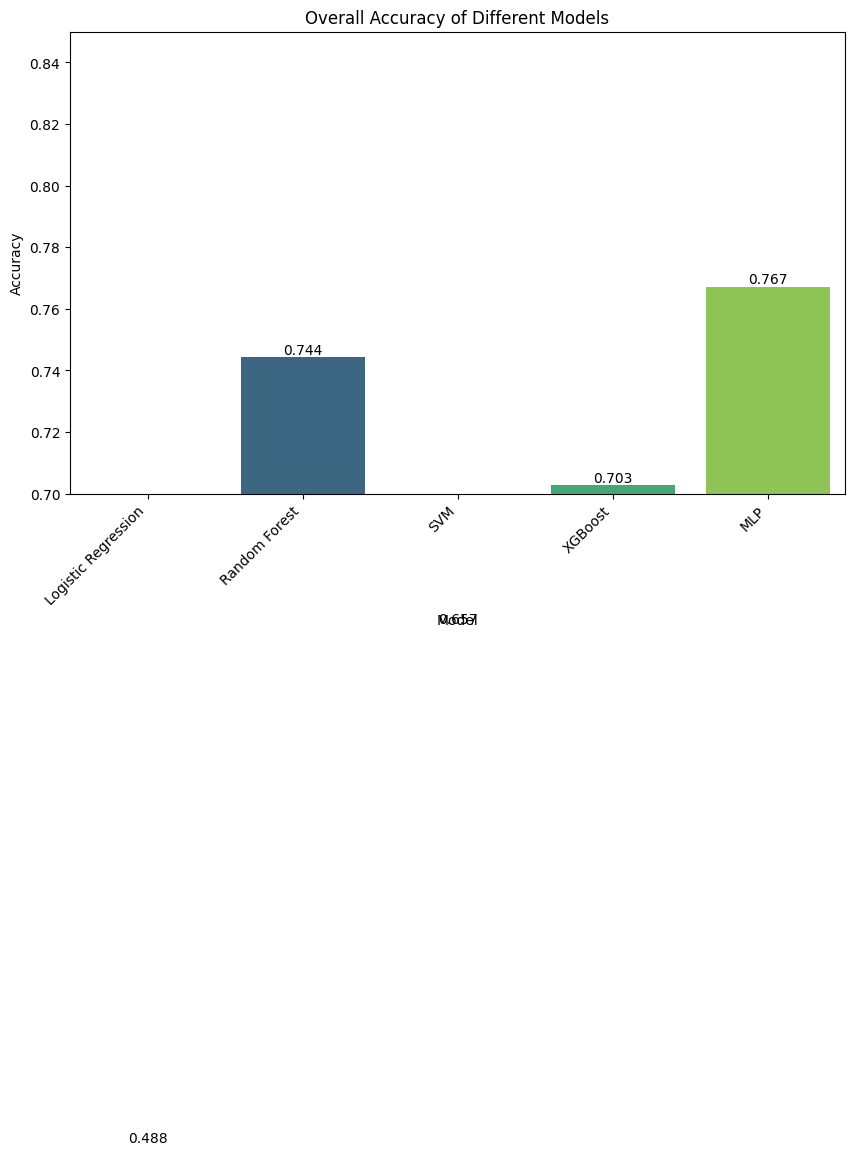

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for overall accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df, palette='viridis', hue=metrics_df.index, legend=False)

# Add labels and title
plt.title('Overall Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.85) # Set y-axis limits to highlight differences
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add accuracy values on top of the bars
for index, row in metrics_df.iterrows():
    plt.text(index, row['Accuracy'], f"{row['Accuracy']:.3f}", color='black', ha="center", va='bottom')

plt.tight_layout()
plt.show()

Key Findings
*   Performance metrics including overall accuracy, macro average precision, recall, f1-score, and weighted average precision, recall, and f1-score were successfully extracted for Logistic Regression, Random Forest, SVM, XGBoost, and MLP models.
*   Random Forest exhibited the highest accuracy among the evaluated models at 0.810.
*   Logistic Regression achieved an accuracy of 0.789.
*   MLP showed the lowest accuracy among the models, recording 0.740.


In [24]:
from scipy.stats import mode

# Stack predictions from all models into a single 2D array
# Each column represents a model's predictions
all_predictions = np.array([
    y_pred_rf,
    y_test_pred_mlp
])

# Apply majority voting across the stacked predictions
# mode(axis=0) finds the mode for each data point (across models)
# The first element of the result is the array of modes
y_pred_ensemble = mode(all_predictions, axis=0)[0]

print("Ensemble predictions generated successfully.")


Ensemble predictions generated successfully.


Ensemble Model Accuracy: 0.7661

Ensemble Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.67      0.66       190
           1       0.79      0.86      0.82       462
           2       0.82      0.68      0.74       263

    accuracy                           0.77       915
   macro avg       0.75      0.73      0.74       915
weighted avg       0.77      0.77      0.76       915

Ensemble Confusion Matrix:

[[127  50  13]
 [ 41 396  25]
 [ 29  56 178]]


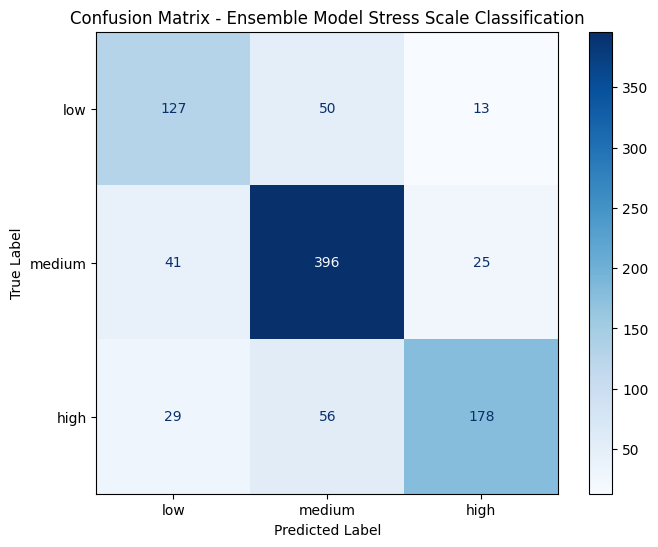

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Calculate and print the overall accuracy of the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.4f}\n")

# 2. Generate and print a detailed classification report for the ensemble model
report_ensemble = classification_report(y_test, y_pred_ensemble, zero_division=0)
print("Ensemble Classification Report:\n")
print(report_ensemble)

# 3. Compute the confusion matrix for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Ensemble Confusion Matrix:\n")
print(conf_matrix_ensemble)

# 4. Create and display a heatmap of the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix_ensemble,
    display_labels=["low", "medium", "high"] # Stress levels
)

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d", ax=plt.gca())
plt.title("Confusion Matrix - Ensemble Model Stress Scale Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()

In [26]:
import joblib
# MLP classifier
joblib.dump(mlp_model, "mlp_model.pkl")

['mlp_model.pkl']